Transforming a variable $Y$ can help with:

- Non-linearity.  
- Non-normality of the errors.  
- Non-constant variance of the errors.  

However, it is often difficult to determine from residual diagnostic plots which transformation of $Y$ is most appropriate.  
The Box-Cox procedure automatically identifies a transformation from the family of power transformations on $Y$.

Consider the family of regression models:

$$
Y_i^{(\lambda)} = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_{p-1} x_{i,p-1} + \epsilon_i, \quad i = 1, \ldots, n
$$

$$
\epsilon_i \overset{iid}{\sim} N(0, \sigma^2)
$$

- The Box-Cox procedure automatically identifies $\lambda$.

Note that this family encompasses the following simple transformations:

$$
\begin{aligned}
\lambda &= 2 \quad & Y' &= Y^2 \\
\lambda &= 0.5 \quad & Y' &= \sqrt{Y} \\
\lambda &= 0 \quad & Y' &= \log(Y) \\
\lambda &= -0.5 \quad & Y' &= \frac{1}{\sqrt{Y}} \\
\lambda &= -1 \quad & Y' &= \frac{1}{Y}
\end{aligned}
$$

> **Note**: $\lambda$ is a parameter and must be estimated.         
> $\qquad$          **e.g.** if $\hat{\lambda} = 2.173 \rightarrow$ then choose $\lambda = 2$         
> **Note**: Estimation of $\lambda$ must be done numerically, i.e., via maximum likelihood estimation.

Optimal lambda: 0.3251


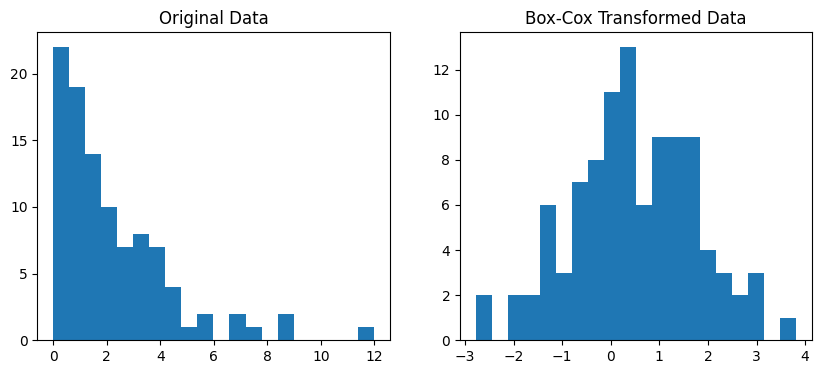

In [1]:
# For single variable

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Example data (All y value must be positive)
y = np.random.exponential(scale=2, size=100)

# Box-Cox transformation
y_transformed, lambda_opt = boxcox(y)

print(f"Optimal lambda: {lambda_opt:.4f}")

# Visualize
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y, bins=20)
plt.title("Original Data")

plt.subplot(1, 2, 2)
plt.hist(y_transformed, bins=20)
plt.title("Box-Cox Transformed Data")
plt.show()

Estimated λ (lambda) values for each variable: [ 0.24399399  0.22962182 -0.18959628]


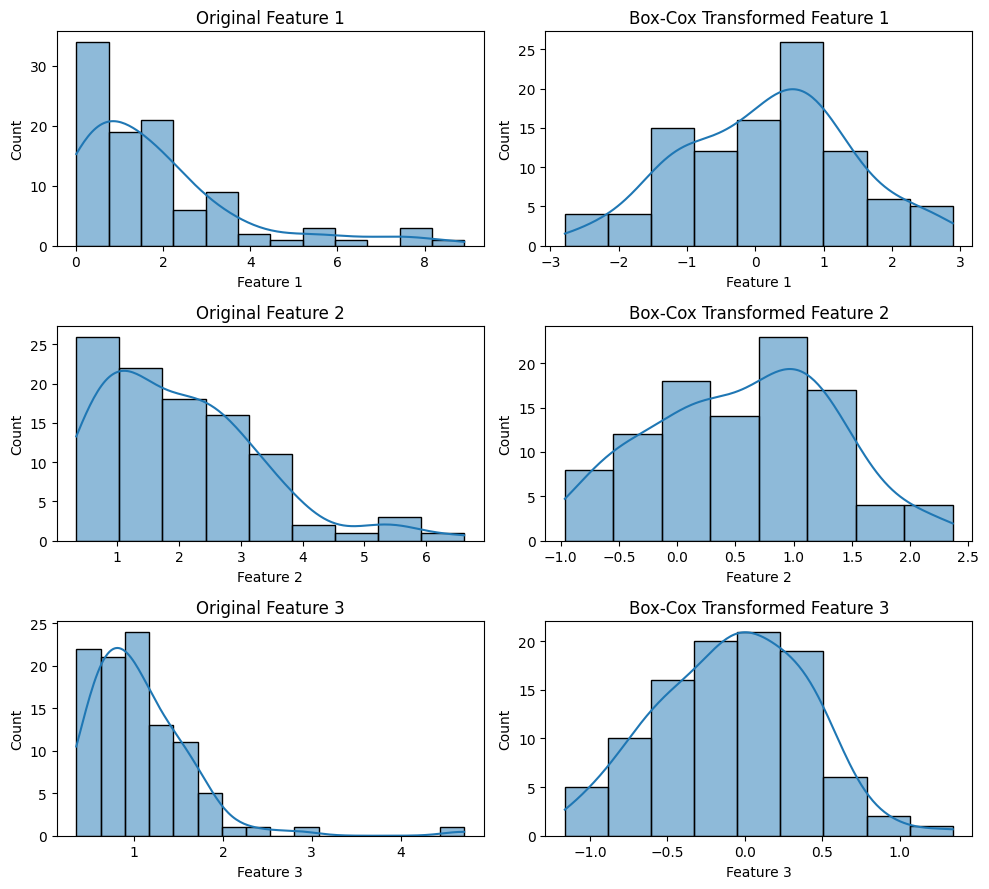

In [ ]:
# For multiple variables

import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Example data: 3 variables (All value must be positive)
np.random.seed(0)
X = np.column_stack([
    np.random.exponential(scale=2, size=100),     # feature 1
    np.random.gamma(shape=2., scale=1., size=100),# feature 2
    np.random.lognormal(mean=0., sigma=0.5, size=100)  # feature 3
])

# Box-Cox transformation
pt = PowerTransformer(method='box-cox', standardize=False)
X_trans = pt.fit_transform(X)
# Note: PowerTransformer requires 2D array input (n_samples, n_features) and all values must be positive
#       `standardize = False` doesn't standardize ((mean=0, std=1) the feature
#        If negative value is included, use 'yeo-johnson' instead.

print("Estimated λ (lambda) values for each variable:", pt.lambdas_)

# Visualize
features = ['Feature 1', 'Feature 2', 'Feature 3']
df_original = pd.DataFrame(X, columns=features)
df_transformed = pd.DataFrame(X_trans, columns=features)

fig, axes = plt.subplots(3, 2, figsize=(10, 9))
for i, col in enumerate(features):
    sns.histplot(df_original[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original {col}")
    sns.histplot(df_transformed[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Box-Cox Transformed {col}")
plt.tight_layout()
plt.show()